# Santander Bank Binary Classification (Algorithm 3)
Using K-Nearest Neighbors

### Importing Packages

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score

### Opening datasets

In [2]:
%%time
with open('../../data/reduced_training_data.csv') as file:
    training_data = pd.read_csv(file)

with open('../../data/reduced_testing_data.csv') as file:
    testing_data = pd.read_csv(file)

with open('../../data/test.csv') as file:
    testing_data1 = pd.read_csv(file)

CPU times: user 13.1 s, sys: 9.98 s, total: 23.1 s
Wall time: 31.6 s


In [19]:
training_int_vals_only = training_data.iloc[:,2:]
testing_int_vals_only = testing_data.iloc[:,1:]

training_target_vals_only = training_data['target']
id_data_ts = testing_data1['ID_code']

### K-Nearest Neighbors

In [22]:
X_train, X_test, y_train, y_test = train_test_split(training_int_vals_only, training_target_vals_only, test_size=0.3, random_state=0, stratify=training_target_vals_only)

In [23]:
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
testing_data_std = sc.transform(testing_int_vals_only)

In [18]:
testing_data

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,1.6591,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,0.9812,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,1.1821,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,1.3104,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,1.6321,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,13.9260,-9.1846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,test_199995,13.1678,1.0136,10.4333,6.7997,8.5974,-4.1641,4.8579,14.7625,-2.7239,...,1.0903,2.0544,9.6849,4.6734,-1.3660,12.8721,1.2013,-4.6195,18.2102,4.8801
199996,test_199996,9.7171,-9.1462,7.3443,9.1421,12.8936,3.0191,5.6888,18.8862,5.0915,...,1.7106,5.0071,6.6548,1.8197,2.4104,18.9037,-0.9337,2.9995,18.1740,-20.7689
199997,test_199997,11.6360,2.2769,11.2074,7.7649,12.6796,11.3224,5.3883,18.3794,1.6603,...,-1.0926,5.1536,2.6498,2.4937,-0.0637,20.0609,-1.1742,-4.1524,11.7905,-22.2762
199998,test_199998,13.5745,-0.5134,13.6584,7.4855,11.2241,-11.3037,4.1959,16.8280,5.3208,...,0.8885,3.4259,8.5012,2.2713,5.7621,17.0056,1.1763,-2.3761,8.7735,-0.2122


In [29]:
%%time
classifier = KNeighborsClassifier(n_neighbors = 2, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

CPU times: user 81 ms, sys: 40.3 ms, total: 121 ms
Wall time: 118 ms


KNeighborsClassifier(n_neighbors=2)

#### Make Predictions

In [34]:
y_pred1 = classifier.predict(X_test)

In [30]:
y_pred = classifier.predict(testing_int_vals_only)

/home/lemaurkydd/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


(array([199670.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,    330.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

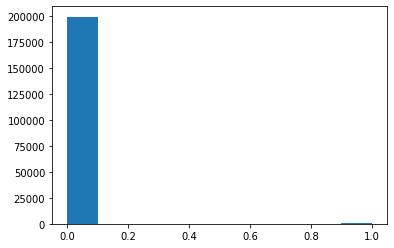

In [31]:
plt.hist(y_pred)

### Evaluation Metrics

In [35]:
cm = confusion_matrix(y_test, y_pred1)
ac = accuracy_score(y_test,y_pred1)

In [36]:
cm

array([[53930,    41],
       [ 6017,    12]])

In [37]:
ac

0.8990333333333334

### Extracting Predictions

In [32]:
# Make predictions on the test set
predictions = y_pred
predictions = np.round(predictions).astype(int).flatten()

# Create the submission file
data = np.column_stack((id_data_ts, predictions))
submission = pd.DataFrame(data, columns=['ID_code', 'target'])
submission.to_csv('submission_knn.csv', index=False)

print("Submission file created successfully!")

Submission file created successfully!
